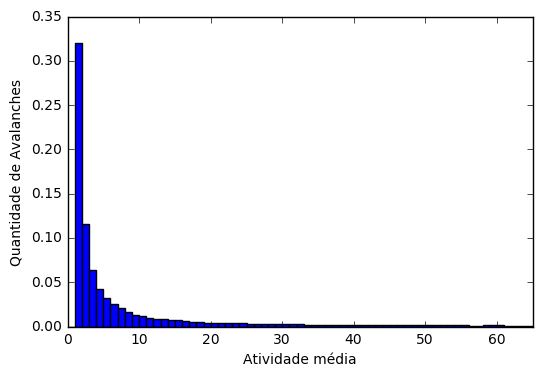

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("aval490.txt", "r") as f:
   lines = f.readlines()
   y = np.array([float(line.split()[0]) for line in lines])
   

J = 2.8
Jint = 28
N = 1024
binwidth = 1
rangemax = 1024
numbins = int(rangemax/binwidth)
#binwidth = rangemax/numbins
hist, binedge_ = np.histogram(y, bins = numbins, range = (0, rangemax), density = True) 

x = np.linspace(0, rangemax, numbins)

plt.bar(x, hist, width = binwidth)

plt.xlim(0, 65)#rangemax)
plt.xlabel("Atividade média")
plt.ylabel("Quantidade de Avalanches")
plt.savefig("HMN 1024 histogram "+str(Jint)+"_1 rede.png")
plt.show()


x = np.linspace(0, np.amax(binedge_), numbins)
df = pd.DataFrame(data = x)
df[1] = hist
df = df[(df[[1]] > 0).all(axis=1)]
df = df[(df[[0]] > 0).all(axis=1)]
df[2] = np.log(df[0])
df[3] = np.log(df[1])
df.columns = ["bins", "quantidade", "log(bins)", "log(atividade)"]



-1.51725592774


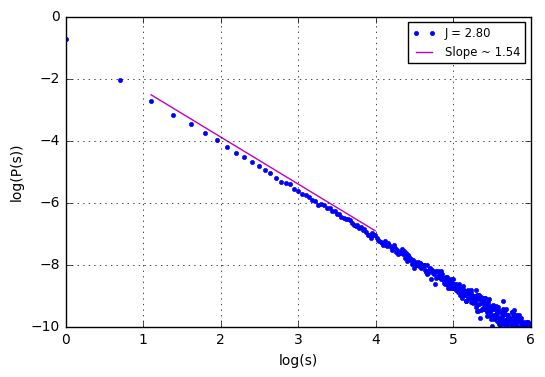

In [35]:

x = np.array(df["log(bins)"])
y = np.array(df["log(atividade)"])
np.savetxt('alog'+str(Jint)+'.txt', np.c_[x,y])
           
plt.plot(x, y, '.', label = "J = "+str("%.2f" % J))


#plt.title("Log Scale")
plt.xlabel("log(s)")
plt.ylabel("log(P(s))")

plt.xlim(0,6)
plt.ylim(-10,0)
plt.grid()

cond = (x>=1) & (x<=4)
xFit = x[ cond ]
yFit = y[ cond ]

z = np.polyfit(xFit, yFit, 1)
a,b = z
p = np.poly1d(z)
#texto = "a = "+str("%.3f" % a)
#plt.text(1, 2.5, texto, fontsize=12)

plt.plot(xFit, p(xFit) +0.2, '-m',  label = "Slope ~ 1.54")
plt.legend(fontsize = 'small')
#pyplot.legend(loc=2, fontsize = 'x-small')
plt.savefig("HMN1024_"+str(Jint)+"_avalanche_1_rede.png")
print(a)
plt.show()